# CASE STUDY

## Problem Statement:
• In telecom domain where the customer acquisition has higher cost than retention and there is a rampant price war ,it becomes important to predict and profile the customer behaviour and predict them so that offers can be rolled out to retain them prioir to switching.

• Data consist of the various behavior customers and last column states if the customer is still with the existing telecom company or not

## Objectives: 
• With the help of data visualization & descriptive stats help us to understand the current state and various factors (or combination of factors )which is contributing to customer churn.

• Develop a prediction algorithm to predict customer churn. 

• Explain how you evaluated the model and which metric chose for your evaluation why? 

• What extra features could have made the model better and give a better explanation of factors leading to churn 

• Based on the descriptive analytics and model results help us to come up with a strategy arrest customer churn.


In [287]:
# Import required libraries
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
import xgboost as xgb


from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report,cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#import m2cgen as m2c 
from sklearn.model_selection import RandomizedSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
#from sklearn.decomposition import PCA
#import pickle
import sklearn

In [288]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [306]:
# Read data and store into pandas dataframe
df = pd.read_csv('/drive/My Drive/Colab Notebooks/data.csv')

Explore the data

In [307]:
print("df.shape : ",df.shape)
df.head(10).transpose()

df.shape :  (3333, 21)


,0,1,2,3,4,5,6,7,8,9
Id,CUST-1,CUST-2,CUST-3,CUST-4,CUST-5,CUST-6,CUST-7,CUST-8,CUST-9,CUST-10
State,KS,OH,NJ,OH,OK,AL,MA,MO,LA,WV
Account length,128,107,137,84,75,118,121,147,117,141
Area code,415,415,415,408,415,510,510,415,408,415
International plan,No,No,No,Yes,Yes,Yes,No,Yes,No,Yes
Voice mail plan,Yes,Yes,No,No,No,No,Yes,No,No,Yes
Number vmail messages,25,26,0,0,0,0,24,0,0,37
Total day minutes,265.1,161.6,243.4,299.4,166.7,223.4,218.2,157,184.5,258.6
Total day calls,110,123,114,71,113,98,88,79,97,84
Total day charge,45.07,27.47,41.38,50.9,28.34,37.98,37.09,26.69,31.37,43.96


In [308]:
# Get Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      3333 non-null   object 
 1   State                   3333 non-null   object 
 2   Account length          3333 non-null   int64  
 3   Area code               3333 non-null   int64  
 4   International plan      3333 non-null   object 
 5   Voice mail plan         3333 non-null   object 
 6   Number vmail messages   3333 non-null   int64  
 7   Total day minutes       3333 non-null   float64
 8   Total day calls         3333 non-null   int64  
 9   Total day charge        3333 non-null   float64
 10  Total eve minutes       3333 non-null   float64
 11  Total eve calls         3333 non-null   int64  
 12  Total eve charge        3333 non-null   float64
 13  Total night minutes     3333 non-null   float64
 14  Total night calls       3333 non-null   

In [309]:
# Get Statistical information on numerical features
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [310]:
# Get number of unique values in each field
for i in df.columns:
    print("\n Unique",i,"'s count' :",df[i].nunique())
    print(df[i].unique())


 Unique Id 's count' : 3333
['CUST-1' 'CUST-2' 'CUST-3' ... 'CUST-3331' 'CUST-3332' 'CUST-3333']

 Unique State 's count' : 51
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

 Unique Account length 's count' : 212
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44 

### Assuming and framing a general understanding of features 

1. Churn :  Classification Label (True/False)

Customer Services 
1. International Plan : If customer has subscribed to international calling facility (Yes/No)
2. Voice mail Plan    : If customer has subscribed to voice mail facility (Yes/No)


CUSTOMER INFORMATION
1. ID : -  Customer ID 
2. State : - US States to which the customer is registered to . This has 51 unique values. Can be dropped.
3. Area Code : -  US states grouped 
                415 Area code -  serves most of San Francisco, CA and the surrounding areas
                408 Area code  - serves San Jose, CA and the surrounding areas
                510 Area code  - Oakland/CA
                
          
CUTOMER ACCOUNT INFO
1. Account length : -  Tenure customer has stayed with the company
                       ( Assuming the number to be in months)
   
BILLING INFO
1. Number vmail messages : Number of voice mail messages last month
2. Total day minutes     : Total number of minutes of all the calls made during the day time last month
3. Total day calls       : Total number of calls made made during the day time last month
4. Total day charge      : Total Charge for the cals made during the day last month
5. Total eve minutes     : Total number of minutes of all the calls made during the evening time last month
6. Total eve calls       : Total number of calls made made during the evening time last month
7. Total eve charge      : Total Charge for the calls made during the evening last month
8. Total night minutes   : Total number of minutes of all the calls made during the night time last month
9. Total night calls     : Total number of calls made made during the night time last month
10. Total night charge   : Total Charge for the calls made during the night last month
11. Total intl minutes   : Total number of minutes of international calls made
12. Total intl calls     : Total number of internatlional calls made
13. Total intl charge    : Total Charge for the international calls made during the night last month
14. Customer service calls : Number of customer service calls made last month



In [311]:
#Checking for missing values
df.isna().sum()

Id                        0
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

OBSERVATION : There are no missing values in any of the fields

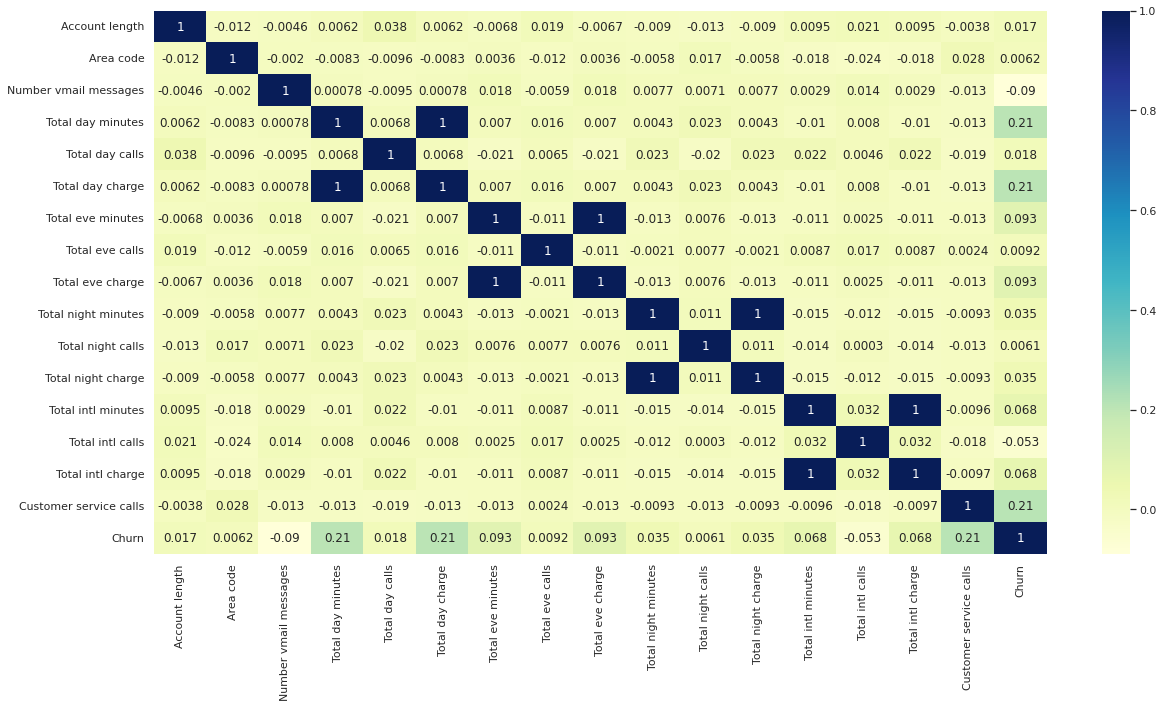

In [312]:
plt.figure(figsize = (20, 10))
dataplot=sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

OBSERVATION : -

[Total day minutes] , [total day chare] and [customer service calls] show 21% correlation to customer churning and 

[Total day minutes] and [total day charge] are highly correlated (100%) , so one of them can be dropped

[Total eve minutes] and [total eve charge] show 9.3 % correlation to churn

[Total eve minutes] and [total eve charge] are highly correlated (100%) , so one of them can be dropped

[Total night minutes] and [total night charge] are highly correlated (100%) , so one of them can be dropped

[Total intl minutes] and [total intl charge] are highly correlated (100%) , so one of them can be dropped

[Total vmail messages] and [total intl calls] show negative correlation(9% and 5.3% respectively) with churn

In [313]:
df = df.drop(['Total day minutes'],axis=1)
df = df.drop(['Total eve minutes'],axis=1)
df = df.drop(['Total night minutes'],axis=1)
df = df.drop(['Total intl minutes'],axis=1)

In [314]:
#Id is not useful
df = df.drop(['Id'],axis=1)
#Drop State - 51 unique values
df = df.drop(['State'],axis=1)

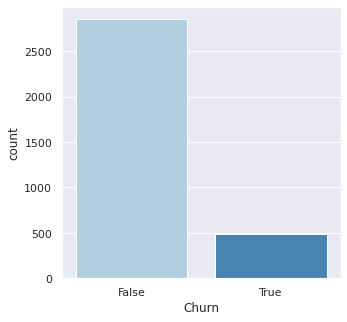

In [315]:
#Frequency distribution for churning
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df['Churn'],palette="Blues",linewidth=1)
plt.show()

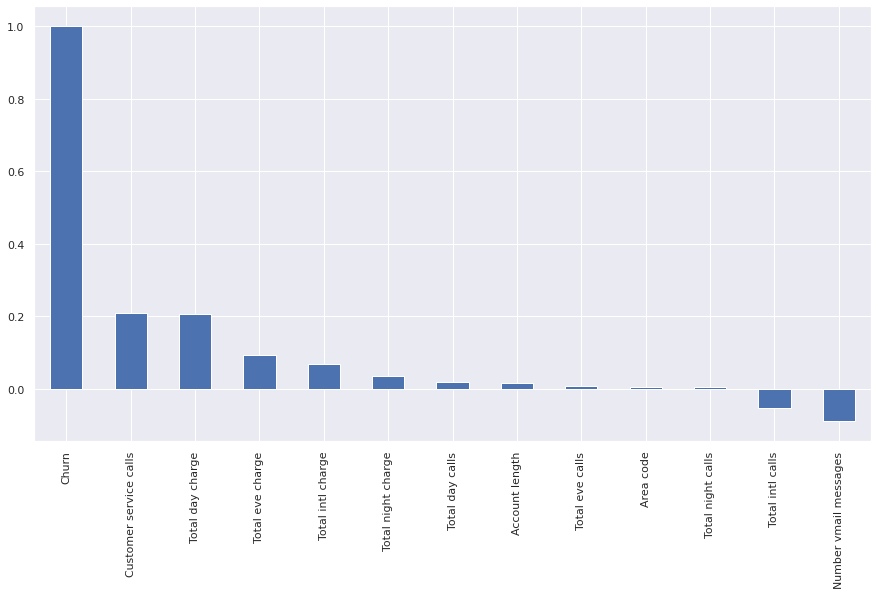

In [316]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Account Length (maximum churning) : 50-150 months


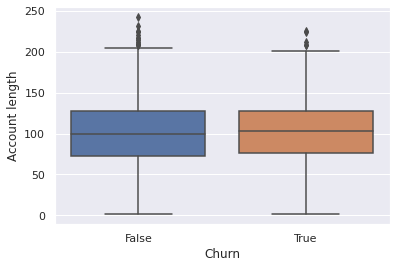

In [317]:
sns.boxplot(x = df.Churn, y = df['Account length'])

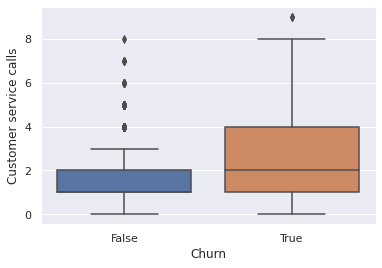

In [318]:
sns.boxplot(x = df.Churn, y = df['Customer service calls'])

 Higher % of customers churn when calls to customer service increase

In [322]:
categorical_features = ['International plan','Voice mail plan','Area code','Churn']
#print(categorical_features)

X_features = df.columns
df_encoded = pd.get_dummies(df[X_features],columns = categorical_features,drop_first = True)
print(df_encoded.head(1).transpose())
df_encoded.rename({"Churn_True":"Churn"},axis='columns' ,inplace = True)

                             0
Account length          128.00
Number vmail messages    25.00
Total day calls         110.00
Total day charge         45.07
Total eve calls          99.00
Total eve charge         16.78
Total night calls        91.00
Total night charge       11.01
Total intl calls          3.00
Total intl charge         2.70
Customer service calls    1.00
International plan_Yes    0.00
Voice mail plan_Yes       1.00
Area code_415             1.00
Area code_510             0.00
Churn_True                0.00


**Oversampling Train data due to class imbalace issue**

(5700, 15) (5700,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


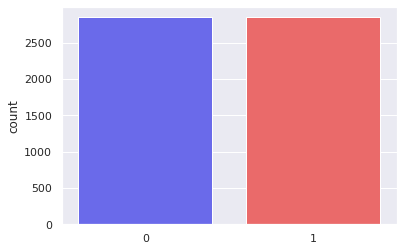

In [323]:
from imblearn.over_sampling import SMOTE
X1=df_encoded.drop("Churn",axis=1)
X= X1.values
y = encoded_data['Churn'].values

oversample = SMOTE()
x_Resampled, y_Resampled = oversample.fit_resample(X, y)

sns.countplot(x=y_Resampled, palette='seismic');
print(x_Resampled.shape,y_Resampled.shape)

In [325]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(x_Resampled)


In [326]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_data_scaled,y_Resampled,test_size=0.8,random_state=42, stratify=y_Resampled)

# KNN Classifier

In [327]:
#Function to plot ROC curve and AUC score
'''ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things 
    (e.g If customer Chrun is yes or No). 
    Better models can accurately distinguish between the two.
    Whereas, a poor model will have difficulties in distinguishing between the two'''

def roc_curve_auc_score(X_test,y_test,y_pred_probabilities,classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label=classifier_name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name}:  ROC curve')
    plt.show()

    print("AUC Score(ROC) : ",roc_auc_score(y_test,y_pred_prob))

# Function to plot Precision Recall curve and F1 score and AUC Curve
def precision_recall_curve_and_scores(X_test,y_test,y_pred,y_pred_probabilities,classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    precision,recall,thresholds = precision_recall_curve(y_test,y_pred_prob)
    plt.plot(recall,precision,label=classifier_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name}- Precision Recall Curve')
    plt.show()

    f1_score_result ,auc_score_result = f1_score(y_test,y_pred),auc(recall,precision)
    print("F1 score :",f1_score_result,"\nAUC Score (PR) : ",auc_score_result)
    return print("")
    
#Function to plot the confusion Matrix
def confusion_matrix_plot(X_train,y_train,X_test,y_test,classifier,y_pred,classifier_name):
        
    ConfusionMatrix = pd.crosstab(y_test, y_pred, rownames=['Actual Label'], colnames=['Predicted Label'], margins=True)
    print(f'CONFUSION MATRIX \n ------------------------\n {ConfusionMatrix}\n\n')
    
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('CONFUSION MATRIX VISUAL', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    
    print(f'\nClassification report \n -----------------------\n {classification_report(y_test,y_pred)}')
    return print("")

def feature_weights(X_df,classifier,classifier_name):
  weights = pd.Series(classifier.coef_[0],index=X_df.columns.values).sort_values(ascending=False)

  top_weights_selected = weights[:10]
  plt.figure(figsize=(7,6))
  plt.tick_params(labelsize=10)
  plt.title(f'{classifier_name} - Top 10 features')
  top_weights_selected.plot(kind="bar")

  top_weights_selected = weights[-10:]
  plt.figure(figsize=(7,6))
  plt.tick_params(labelsize=10)
  plt.title(f'{classifier_name} - Bottom 10 features')
  top_weights_selected.plot(kind="bar")

  return print("")

CONFUSION MATRIX 
 ------------------------
 Predicted Label     0     1   All
Actual Label                     
0                1721   559  2280
1                 265  2015  2280
All              1986  2574  4560




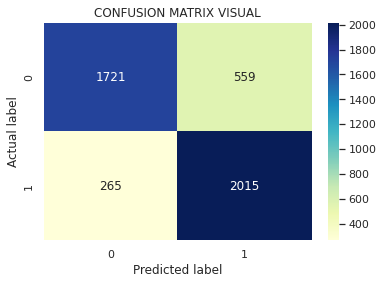


Classification report 
 -----------------------
               precision    recall  f1-score   support

           0       0.87      0.75      0.81      2280
           1       0.78      0.88      0.83      2280

    accuracy                           0.82      4560
   macro avg       0.82      0.82      0.82      4560
weighted avg       0.82      0.82      0.82      4560




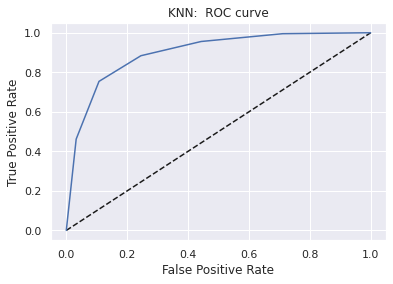

AUC Score(ROC) :  0.8975283741151124
cohen_kappa_score: 0.6385964912280702


In [328]:
# K Nearest Neighbours 
#Instantiate and and train the KNN classifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# Make Predictions
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

confusion_matrix_plot(X_train,y_train,X_test,y_test,knn,y_pred_knn,'KNN')
roc_curve_auc_score(X_test,y_test,y_pred_knn_prob,'KNN')
print(f'cohen_kappa_score: {cohen_kappa_score(y_test, y_pred_knn)}')

**Hyperparameter Tuning/Model Improvement : Grid Search**


In [329]:
#import GridSearchCV
#GridSearchCV implements a “fit” and a “score” method.
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [330]:
print(f'Score is :{knn_cv.best_score_}')
bestValOfK = knn_cv.best_params_
print('Finding Best Value of K is:',bestValOfK)

Score is :0.8385964912280702
Finding Best Value of K is: {'n_neighbors': 8}


In [331]:
# K Nearest Neighbours 
#Instantiate and and train the KNN classifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30,metric='minkowski',metric_params=None, n_jobs=None,n_neighbors=18, p=2,weights='uniform')
knn.fit(X_train,y_train)

# Make Predictions
y_pred_knn_tuned = knn.predict(X_test)
y_pred_knn_tuned_prob = knn.predict_proba(X_test)

CONFUSION MATRIX 
 ------------------------
 Predicted Label     0     1   All
Actual Label                     
0                1840   440  2280
1                 360  1920  2280
All              2200  2360  4560




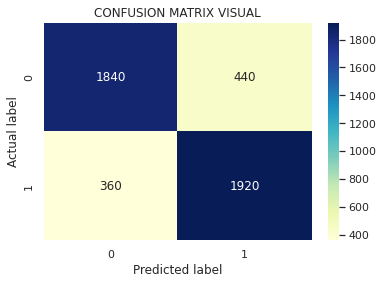


Classification report 
 -----------------------
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      2280
           1       0.81      0.84      0.83      2280

    accuracy                           0.82      4560
   macro avg       0.82      0.82      0.82      4560
weighted avg       0.82      0.82      0.82      4560




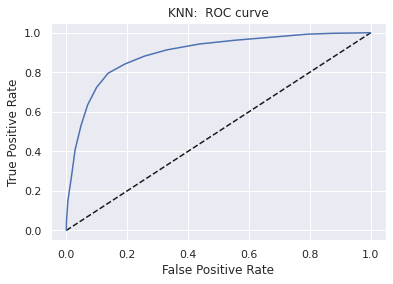

AUC Score(ROC) :  0.8944968644198215
cohen_kappa_score: 0.6491228070175439


In [332]:
confusion_matrix_plot(X_train,y_train,X_test,y_test,knn,y_pred_knn_tuned,'KNN')
roc_curve_auc_score(X_test,y_test,y_pred_knn_tuned_prob,'KNN')
print(f'cohen_kappa_score: {cohen_kappa_score(y_test, y_pred_knn_tuned)}')

Logistic Regression

In [333]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [334]:
#Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_log_proba(X_test)

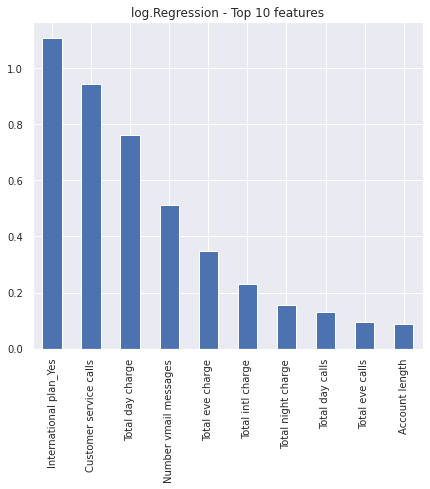

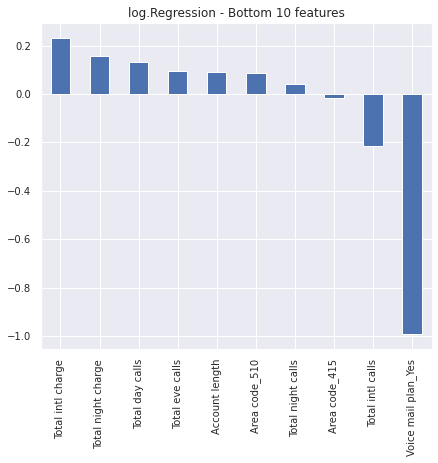

In [335]:
#Plot model Evaluations
feature_weights(X1,logreg,'log.Regression')


CONFUSION MATRIX 
 ------------------------
 Predicted Label     0     1   All
Actual Label                     
0                1792   488  2280
1                 519  1761  2280
All              2311  2249  4560




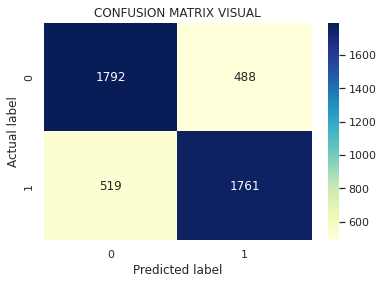


Classification report 
 -----------------------
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      2280
           1       0.78      0.77      0.78      2280

    accuracy                           0.78      4560
   macro avg       0.78      0.78      0.78      4560
weighted avg       0.78      0.78      0.78      4560




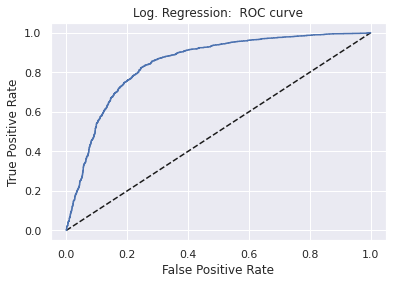

AUC Score(ROC) :  0.846104378270237
cohen_kappa_score: 0.5583333333333333


In [336]:
confusion_matrix_plot(X_train,y_train,X_test,y_test,logreg,y_pred_logreg,'Log. Regression')
roc_curve_auc_score(X_test,y_test,y_pred_logreg_prob,'Log. Regression')
print(f'cohen_kappa_score: {cohen_kappa_score(y_test, y_pred_logreg)}')

Logistic Regression Optimized

For Logistic Regression GridSearchCV is used to determine the best model while applying different values of L1 or L2 regularization to turn the impact of non-meaningful feature to zero (L1) or to simplify the model by relativizing strong patterns that are picked up during training (L2).

Logistic Regression Best Parameters :  {'C': 0.1, 'penalty': 'l1'}
CONFUSION MATRIX 
 ------------------------
 Predicted Label     0     1   All
Actual Label                     
0                1809   471  2280
1                 505  1775  2280
All              2314  2246  4560




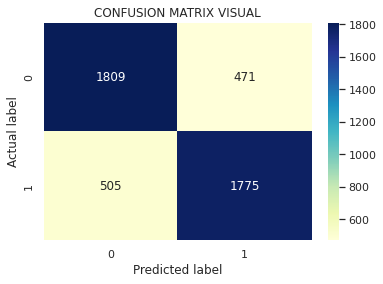


Classification report 
 -----------------------
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      2280
           1       0.79      0.78      0.78      2280

    accuracy                           0.79      4560
   macro avg       0.79      0.79      0.79      4560
weighted avg       0.79      0.79      0.79      4560




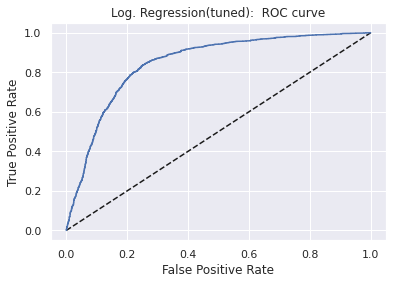

AUC Score(ROC) :  0.8465801015697139
cohen_kappa_score: 0.5719298245614035


In [337]:
param_grid_L1 = {'penalty' :['l1','l2'],'C':np.arange(.1,5,.1)}
logreg_tuned  = LogisticRegression(solver='saga',max_iter=1000)
logreg_tuned_gs = GridSearchCV(logreg_tuned,param_grid_L1,cv=5)
logreg_tuned_gs.fit(X_train,y_train)

print('Logistic Regression Best Parameters : ',logreg_tuned_gs.best_params_)

#Make Predictions
y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)

#Model Evaluations
confusion_matrix_plot(X_train,y_train,X_test,y_test,logreg_tuned_gs,y_pred_logreg_tuned,'Log. Regression(tuned)')
roc_curve_auc_score(X_test,y_test,y_pred_logreg_tuned_prob,'Log. Regression(tuned)')
print(f'cohen_kappa_score: {cohen_kappa_score(y_test, y_pred_logreg_tuned)}')

Random Forest

CONFUSION MATRIX 
 ------------------------
 Predicted Label     0     1   All
Actual Label                     
0                2102   178  2280
1                 176  2104  2280
All              2278  2282  4560




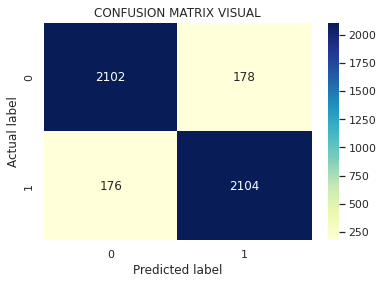


Classification report 
 -----------------------
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      2280
           1       0.92      0.92      0.92      2280

    accuracy                           0.92      4560
   macro avg       0.92      0.92      0.92      4560
weighted avg       0.92      0.92      0.92      4560




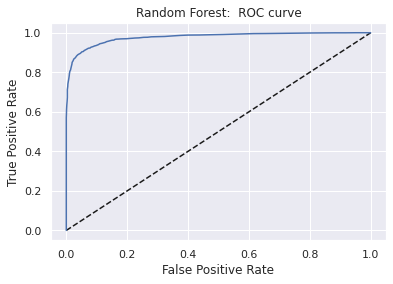

AUC Score(ROC) :  0.977139793013235
cohen_kappa_score: 0.8447368421052631


In [338]:
#Instantiate and train random forest model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

#Make predictions 
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

#Model Evaluations
confusion_matrix_plot(X_train,y_train,X_test,y_test,rf,y_pred_rf,'Random Forest')
roc_curve_auc_score(X_test,y_test,y_pred_rf_prob,'Random Forest')
print(f'cohen_kappa_score: {cohen_kappa_score(y_test, y_pred_rf)}')

**Random Forest Optimized**

For the Random Forest model RandomizedSearchCV is used to optimize for several hyperparameters including n_estimators, max_features, max_depth, criterion and bootstrap.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1950, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1950, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True, score=0.912, total=   5.2s
[CV] n_estimators=1950, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  n_estimators=1950, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True, score=0.921, total=   5.4s
[CV] n_estimators=1950, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.6s remaining:    0.0s


[CV]  n_estimators=1950, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True, score=0.899, total=   4.8s
[CV] n_estimators=1950, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.4s remaining:    0.0s


[CV]  n_estimators=1950, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True, score=0.921, total=   5.0s
[CV] n_estimators=1950, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.4s remaining:    0.0s


[CV]  n_estimators=1950, max_features=sqrt, max_depth=50, criterion=gini, bootstrap=True, score=0.921, total=   5.2s
[CV] n_estimators=1130, max_features=auto, max_depth=110, criterion=entropy, bootstrap=True 
[CV]  n_estimators=1130, max_features=auto, max_depth=110, criterion=entropy, bootstrap=True, score=0.908, total=   4.0s
[CV] n_estimators=1130, max_features=auto, max_depth=110, criterion=entropy, bootstrap=True 
[CV]  n_estimators=1130, max_features=auto, max_depth=110, criterion=entropy, bootstrap=True, score=0.925, total=   3.8s
[CV] n_estimators=1130, max_features=auto, max_depth=110, criterion=entropy, bootstrap=True 
[CV]  n_estimators=1130, max_features=auto, max_depth=110, criterion=entropy, bootstrap=True, score=0.908, total=   3.9s
[CV] n_estimators=1130, max_features=auto, max_depth=110, criterion=entropy, bootstrap=True 
[CV]  n_estimators=1130, max_features=auto, max_depth=110, criterion=entropy, bootstrap=True, score=0.917, total=   3.8s
[CV] n_estimators=1130, max

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


Random Forest - Best Parameters :  {'n_estimators': 1950, 'max_features': 'sqrt', 'max_depth': 110, 'criterion': 'entropy', 'bootstrap': False}
CONFUSION MATRIX 
 ------------------------
 Predicted Label     0     1   All
Actual Label                     
0                2137   143  2280
1                 147  2133  2280
All              2284  2276  4560




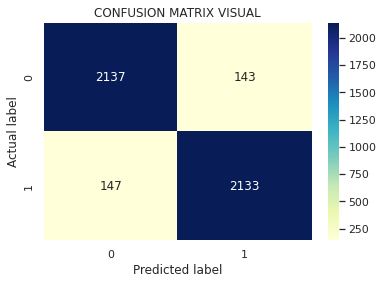


Classification report 
 -----------------------
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2280
           1       0.94      0.94      0.94      2280

    accuracy                           0.94      4560
   macro avg       0.94      0.94      0.94      4560
weighted avg       0.94      0.94      0.94      4560




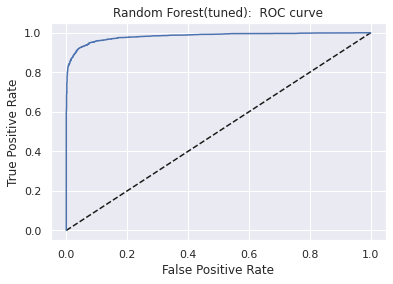

AUC Score(ROC) :  0.9823369690674054
cohen_kappa_score: 0.8728070175438596


In [339]:
#Define parameter grid for RandomizedSearch
param_grid_rf = {'n_estimators' : np.arange(10,2000,10),
                 'max_features' : ['auto','sqrt'],
                 'max_depth' : np.arange(10,200,10),
                 'criterion' : ['gini','entropy'],
                 'bootstrap' : [True,False]}

#Instantiate and train random forest model
rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf,param_distributions=param_grid_rf,cv=5,verbose=5)
rf_random_grid.fit(X_train,y_train)

print('Random Forest - Best Parameters : ',rf_random_grid.best_params_)

#Make predictions 
y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)



#Model Evaluations
confusion_matrix_plot(X_train,y_train,X_test,y_test,rf_random_grid,y_pred_rf_tuned,'Random Forest(tuned)')
roc_curve_auc_score(X_test,y_test,y_pred_rf_tuned_prob,'Random Forest(tuned)')
print(f'cohen_kappa_score: {cohen_kappa_score(y_test, y_pred_rf_tuned)}')

Support Vector Machine

CONFUSION MATRIX 
 ------------------------
 Predicted Label     0     1   All
Actual Label                     
0                2023   257  2280
1                 320  1960  2280
All              2343  2217  4560




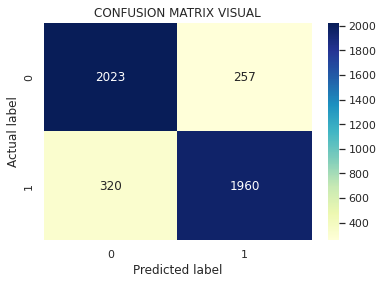


Classification report 
 -----------------------
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      2280
           1       0.88      0.86      0.87      2280

    accuracy                           0.87      4560
   macro avg       0.87      0.87      0.87      4560
weighted avg       0.87      0.87      0.87      4560




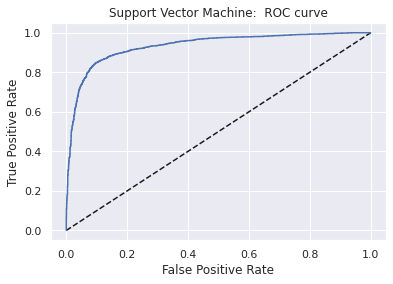

AUC Score(ROC) :  0.9331391389658356
cohen_kappa_score: 0.7469298245614036


In [340]:
#Instantiate and train SVM model
support_vector_m = SVC(kernel='rbf',probability=True)
support_vector_m.fit(X_train,y_train)

#Make Predictions
y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

#Model Evaluations
confusion_matrix_plot(X_train,y_train,X_test,y_test,support_vector_m,y_pred_svm,'Support Vector Machine')
roc_curve_auc_score(X_test,y_test,y_pred_svm_prob,'Support Vector Machine')
print(f'cohen_kappa_score: {cohen_kappa_score(y_test, y_pred_svm)}')

**Support Vector Machine (optimized)**

For SVM GridSearchCV is used to determine the C value for the optimal margin around the support vector.

Best C value : {'C': 0.2}
CONFUSION MATRIX 
 ------------------------
 Predicted Label     0     1   All
Actual Label                     
0                1762   518  2280
1                 427  1853  2280
All              2189  2371  4560




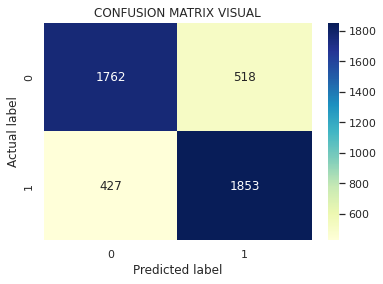


Classification report 
 -----------------------
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      2280
           1       0.78      0.81      0.80      2280

    accuracy                           0.79      4560
   macro avg       0.79      0.79      0.79      4560
weighted avg       0.79      0.79      0.79      4560




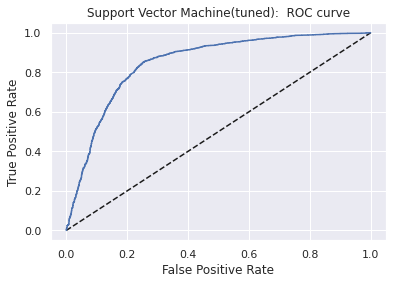

AUC Score(ROC) :  0.8484689519852262
cohen_kappa_score: 0.5855263157894737


In [341]:
#Define parameter for GridSearch
param_grid_svm = {'C':np.arange(.1,3,.1)}
support_vector_m = SVC(kernel='linear',probability=True)
support_vector_m_tuned = GridSearchCV(support_vector_m,param_grid_svm,cv=5)
support_vector_m_tuned.fit(X_test,y_test)

#Make Predictions
y_pred_svm_tuned = support_vector_m_tuned.predict(X_test)
y_pred_svm_tuned_prob = support_vector_m_tuned.predict_proba(X_test)

print('Best C value :' , support_vector_m_tuned.best_params_)

#Model Evaluations
confusion_matrix_plot(X_train,y_train,X_test,y_test,support_vector_m_tuned,y_pred_svm_tuned,'Support Vector Machine(tuned)')
roc_curve_auc_score(X_test,y_test,y_pred_svm_tuned_prob,'Support Vector Machine(tuned)')
print(f'cohen_kappa_score: {cohen_kappa_score(y_test, y_pred_svm_tuned)}')

**Feed Forward Neural Network**

Although the data set is relatively small and neural networks generally require lots of training data to develop meaningful prediction capabilities, a simple neural network is employed for a quick comparison to the other approaches.

In [342]:
from keras.models import Sequential,load_model
from keras import layers
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint

In [343]:
#Instantiate Neural Network,build up layer structure and compile model
nn = Sequential()
Input_Shape = X_train.shape[1]

nn.add(layers.Dense(1024,input_shape=(Input_Shape,),activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1024,activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1,activation='sigmoid'))
nn.compile(loss= 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#nn.summary()

mc = ModelCheckpoint('best_model.h5',monitor='val_accuracy',mode='max',verbose=0,save_best_only=True)

fit_nn = nn.fit(X_train,y_train,
                epochs =100,
                verbose=False,
                validation_data = (X_test,y_test),
                batch_size=30,callbacks=[mc])



accuracy of the model:  0.8883771929824561


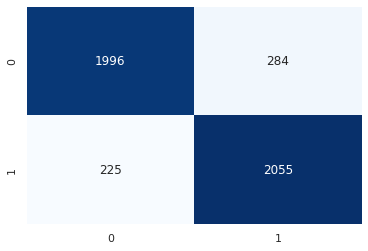

In [344]:
# Predicting the Test set results
y_pred_nn = nn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_nn.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred_nn.round())
print('accuracy of the model: ',ac)


In [345]:
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]

F1_Score = (2*TP)/((2*TP) + FP + FN)
print('F1 Score : ',F1_Score)

Precision = (TP)/(TP+FP)
print('Precision : ',Precision)

Recall = (TP)/(TP+FN)
print('Recall : ',Recall)

print(f'cohen_kappa_score: {cohen_kappa_score(y_test, y_pred_nn.round())}')

F1 Score :  0.8869140191068652
Precision :  0.8986942818550203
Recall :  0.875438596491228
cohen_kappa_score: 0.7767543859649123


Looking at model results, the best accuracy on the given data set is achieved by Random Forest

 •	Cohen’s kappa statistic is a very good measure that can handle very well both multi-class and imbalanced class problems.

•	Cohen’s kappa is always less than or equal to 1. Values of 0 or less, indicate that the classifier is useless. There is no standardized way to interpret its values. Landis and Koch (1977) provide a way to characterize values. According to their scheme a value < 0 is indicating no agreement, 0–0.20 as slight, 0.21–0.40 as fair, 0.41–0.60 as moderate, 0.61–0.80 as substantial, and 0.81–1 as almost perfect agreement.

•	Kappa scores provide better reliability in case of imbalance data which is in our case.

•	For Non-churn  cases accuracy can be a good performance indicator. However for Churn cases it is better to consider Kappa Score & Recall as performance indicator.

•	Based on my experiment and in the given timelines i find Random Forest model as best model. 

